In [1]:
import os
import logging

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.1);

In [2]:
logging_format_str = '%(asctime)s:%(name)s:%(levelname)s:%(message)s'
logging.basicConfig(format=logging_format_str, level=logging.WARNING)
logger = logging.getLogger('STT')
logger.setLevel(level=logging.DEBUG)

In [3]:
DATA_ROOT_DP = os.environ['DATA_HOME']
CV_DP = f'{DATA_ROOT_DP}/datasets/cv-corpus-8.0-2022-01-19/be'

In [4]:
os.listdir(CV_DP)

['dev.tsv',
 'validated.tsv',
 'train.tsv',
 'clips',
 'reported.tsv',
 'invalidated.tsv',
 'other.tsv',
 'test.tsv']

In [5]:
df_train = pd.read_csv(os.path.join(CV_DP, 'train.tsv'), delimiter='\t')
df_dev = pd.read_csv(os.path.join(CV_DP, 'dev.tsv'), delimiter='\t')
df_test = pd.read_csv(os.path.join(CV_DP, 'test.tsv'), delimiter='\t')
df_validated = pd.read_csv(os.path.join(CV_DP, 'validated.tsv'), delimiter='\t')
df_invalidated = pd.read_csv(os.path.join(CV_DP, 'invalidated.tsv'), delimiter='\t')
df_other = pd.read_csv(os.path.join(CV_DP, 'other.tsv'), delimiter='\t')
df_reported = pd.read_csv(os.path.join(CV_DP, 'reported.tsv'), delimiter='\t')

logger.debug(f'df_train.shape: {df_train.shape}')
logger.debug(f'df_dev.shape: {df_dev.shape}')
logger.debug(f'df_test.shape: {df_test.shape}')
logger.debug(f'df_validated.shape: {df_validated.shape}')
logger.debug(f'df_invalidated.shape: {df_invalidated.shape}')
logger.debug(f'df_other.shape: {df_other.shape}')
logger.debug(f'df_reported.shape: {df_reported.shape}')

/tmp/ipykernel_8836/3704487974.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_validated = pd.read_csv(os.path.join(CV_DP, 'validated.tsv'), delimiter='\t')
2022-03-27 14:08:07,139:STT:DEBUG:df_train.shape: (314305, 10)
2022-03-27 14:08:07,140:STT:DEBUG:df_dev.shape: (15803, 10)
2022-03-27 14:08:07,140:STT:DEBUG:df_test.shape: (15801, 10)
2022-03-27 14:08:07,141:STT:DEBUG:df_validated.shape: (677936, 10)
2022-03-27 14:08:07,141:STT:DEBUG:df_invalidated.shape: (22178, 10)
2022-03-27 14:08:07,142:STT:DEBUG:df_other.shape: (40596, 10)
2022-03-27 14:08:07,142:STT:DEBUG:df_reported.shape: (3082, 4)


In [6]:
# do not include `df_reported` as it contains info about sentences, not clips
frames = [df_train, df_dev, df_test, df_validated, df_invalidated, df_other]
names = ['df_train', 'df_dev', 'df_test', 'df_validated', 'df_invalidated', 'df_other']

In [7]:
df_train.head(3)

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
0,9356b041bf9c40eb40bc036a354b69f47709e0cae8d619...,common_voice_be_29365148.mp3,Прыкладам таму можа быць мой уласны досвед.,2,0,NaN,NaN,NaN,be,NaN
1,9356b041bf9c40eb40bc036a354b69f47709e0cae8d619...,common_voice_be_29365149.mp3,"У яго было столькі пазітыву і таланту, што хап...",2,1,NaN,NaN,NaN,be,NaN
2,9356b041bf9c40eb40bc036a354b69f47709e0cae8d619...,common_voice_be_29365150.mp3,"Малады хлопец, кандыдат мастацтвазнаўства, вел...",2,0,NaN,NaN,NaN,be,NaN


In [8]:
df_reported.head(3)

,sentence,sentence_id,locale,reason
0,Падводная частка катлавіна карытападобнай формы.,011985f231b245445d4caa543609c45e7f79d5081358cf...,be,grammar-or-spelling
1,Усё жыццё займаўся праблемамі уніфікацыі і ста...,012272ad82d20200aa7edb1d1b191d3e5660e3781a339d...,be,grammar-or-spelling
2,Па пачатку не прызнаная народам іншаземка хутк...,01428fe764265a76b0d8ba98abafbd1ff8a5c465e6432c...,be,grammar-or-spelling


## check duplicates & nans

In [9]:
df_train.head(2)

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
0,9356b041bf9c40eb40bc036a354b69f47709e0cae8d619...,common_voice_be_29365148.mp3,Прыкладам таму можа быць мой уласны досвед.,2,0,NaN,NaN,NaN,be,NaN
1,9356b041bf9c40eb40bc036a354b69f47709e0cae8d619...,common_voice_be_29365149.mp3,"У яго было столькі пазітыву і таланту, што хап...",2,1,NaN,NaN,NaN,be,NaN


In [10]:
cols_to_check = ['client_id', 'path', 'sentence', 'up_votes', 'down_votes']
for _frame, _name in zip(frames, names):
    n_nans = _frame[cols_to_check].isna().sum().sum()
    n_dups = _frame.duplicated('path').sum()
    logger.debug(f'{_name :<15} # duplicates: {n_dups}. # nans: {n_nans}')

2022-03-27 14:08:07,311:STT:DEBUG:df_train        # duplicates: 0. # nans: 0
2022-03-27 14:08:07,320:STT:DEBUG:df_dev          # duplicates: 0. # nans: 0
2022-03-27 14:08:07,328:STT:DEBUG:df_test         # duplicates: 0. # nans: 0
2022-03-27 14:08:07,644:STT:DEBUG:df_validated    # duplicates: 0. # nans: 0
2022-03-27 14:08:07,656:STT:DEBUG:df_invalidated  # duplicates: 0. # nans: 0
2022-03-27 14:08:07,673:STT:DEBUG:df_other        # duplicates: 0. # nans: 0


## check splits overlap

### user ids. users do not overlap between folds


In [11]:
stats = [
    [len(set(frames[i]['client_id']).intersection(frames[j]['client_id'])) for j in range(len(frames))]
    for i in range(len(frames))
]
pd.DataFrame(stats, columns=names, index=names)

,df_train,df_dev,df_test,df_validated,df_invalidated,df_other
df_train,2222,0,0,2222,1804,556
df_dev,0,1017,0,1017,528,81
df_test,0,0,2779,2779,998,103
df_validated,2222,1017,2779,6018,3330,740
df_invalidated,1804,528,998,3330,3384,559
df_other,556,81,103,740,559,831


In [12]:
assert sum(x['client_id'].nunique() for x in frames[:3]) == df_validated['client_id'].nunique()

In [13]:
users_total = len(set().union(*[x['client_id'] for x in frames]))
logger.debug(f'users_total: {users_total}')

2022-03-27 14:08:08,405:STT:DEBUG:users_total: 6160


### sentences. sentences not overlap between folds

TODO:
* there are sentences both in `df_reported` and in `df_train`, etc.

In [14]:
stats = [
    [len(set(f1['sentence']).intersection(f2['sentence'])) 
     for f2 in frames + [df_reported]
    ]
    for f1 in frames + [df_reported]
]
pd.DataFrame(stats, columns=names + ['df_reported'], index=names + ['df_reported'])

,df_train,df_dev,df_test,df_validated,df_invalidated,df_other,df_reported
df_train,314305,0,0,314305,19163,26535,1756
df_dev,0,15803,0,15803,677,1292,206
df_test,0,0,15801,15801,701,1489,198
df_validated,314305,15803,15801,345909,20541,29316,2160
df_invalidated,19163,677,701,20541,21564,1524,408
df_other,26535,1292,1489,29316,1524,29687,266
df_reported,1756,206,198,2160,408,266,2199


In [15]:
assert sum([x['sentence'].nunique() for x in frames[:3]]) == df_validated['sentence'].nunique()

In [16]:
users_total = len(set().union(*[x['sentence'] for x in frames]))
logger.debug(f'sentences total: {users_total}')

2022-03-27 14:08:12,244:STT:DEBUG:sentences total: 347010


#### each sentence was voiced only once in each split

In [17]:
for _frame, _name in zip(frames[:3], names[:3]):
    logger.debug(f'{_name}:')
    display(_frame.groupby(['sentence']).size().value_counts(dropna=False).sort_index())

2022-03-27 14:08:12,253:STT:DEBUG:df_train:


1    314305
dtype: int64

2022-03-27 14:08:12,691:STT:DEBUG:df_dev:


1    15803
dtype: int64

2022-03-27 14:08:12,706:STT:DEBUG:df_test:


1    15801
dtype: int64

#### `df_validated` contains multiple voicings of same sentences

In [18]:
df_validated.groupby(['sentence']).size().value_counts(dropna=False).sort_index()

1     36700
2    286781
3     22058
4       351
5        18
6         1
dtype: int64

#### no clip was voiced > 1 times by single person

In [19]:
df_validated.groupby(['client_id', 'sentence']).size().value_counts()

1    677936
dtype: int64

### clips

In [20]:
stats = [
    [len(set(frames[i]['path']).intersection(frames[j]['path'])) for j in range(len(frames))]
    for i in range(len(frames))
]
pd.DataFrame(stats, columns=names, index=names)

,df_train,df_dev,df_test,df_validated,df_invalidated,df_other
df_train,314305,0,0,314305,0,0
df_dev,0,15803,0,15803,0,0
df_test,0,0,15801,15801,0,0
df_validated,314305,15803,15801,677936,0,0
df_invalidated,0,0,0,0,22178,0
df_other,0,0,0,0,0,40596


In [21]:
sum([x['path'].nunique() for x in frames[:3]]) == df_validated['path'].nunique()

False

#### `df_validated` contains multiple voicings of same sentences

In [22]:
x = set().union(*[x['path'] for x in frames[:3]])
clips_from_diff = list(set(df_validated['path']).difference(x))
print(len(clips_from_diff))

332027


In [23]:
clips_from_diff[:4]

['common_voice_be_30033538.mp3',
 'common_voice_be_29743075.mp3',
 'common_voice_be_29308635.mp3',
 'common_voice_be_27305775.mp3']

In [24]:
check = df_validated[df_validated['path'].isin(clips_from_diff)].copy()
check.shape

(332027, 10)

In [25]:
check.loc[check['sentence'].isin(df_train['sentence']), 'found_in'] = 'train'
check.loc[check['sentence'].isin(df_dev['sentence']), 'found_in'] = 'dev'
check.loc[check['sentence'].isin(df_test['sentence']), 'found_in'] = 'test'

In [26]:
check['found_in'].value_counts(dropna=False)

train    298855
dev       16588
test      16584
Name: found_in, dtype: int64

## can enlarge train/dev/test sets
* can include > 1 voicing of same sentences to each split
* train size increases in 2 times

In [27]:
df_validated_2 = df_validated.copy()

In [28]:
df_validated_2.loc[df_validated_2['sentence'].isin(df_train['sentence']), 'split'] = 'train'
df_validated_2.loc[df_validated_2['sentence'].isin(df_dev['sentence']), 'split'] = 'dev'
df_validated_2.loc[df_validated_2['sentence'].isin(df_test['sentence']), 'split'] = 'test'

In [29]:
df_validated_2['split'].value_counts(dropna=False)

train    613160
dev       32391
test      32385
Name: split, dtype: int64

In [30]:
assert (df_validated_2.groupby(['sentence'])['split'].nunique() == 1).all() == True

### number of voicings of same sentence

In [31]:
voicings_dist = {}
for split in ['train', 'dev', 'test']:
    voicings_dist[split] = df_validated_2.query(
        'split == @split')['sentence'].value_counts()

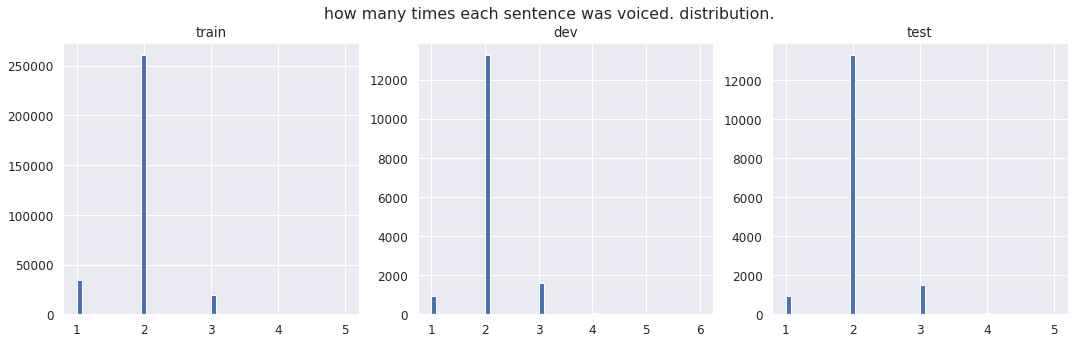

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(3 * 6, 5))
for split, _ax in zip(['train', 'dev', 'test'], ax):
    voicings_dist[split].hist(bins=50, log=False, ax=_ax);
    _ax.set_title(split);
fig.suptitle('how many times each sentence was voiced. distribution.');

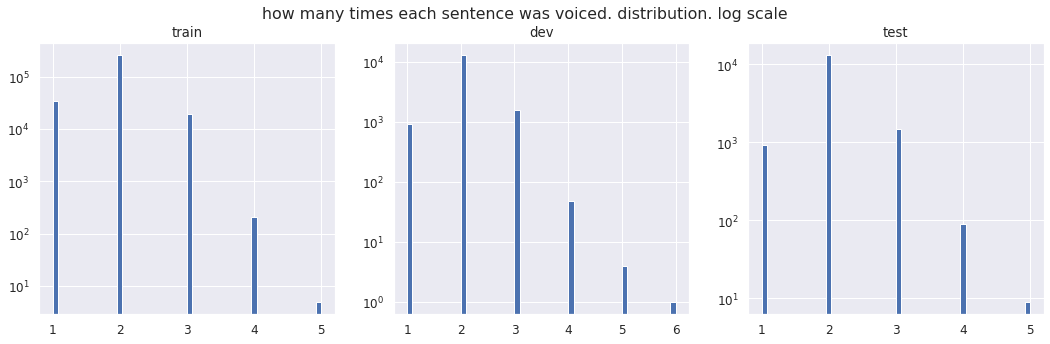

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(3 * 6, 5))
for split, _ax in zip(['train', 'dev', 'test'], ax):
    voicings_dist[split].hist(bins=50, log=True, ax=_ax);
    _ax.set_title(split);
fig.suptitle('how many times each sentence was voiced. distribution. log scale');

## upvotes vs downvotes

In [34]:
pd.crosstab(df_validated['up_votes'], df_validated['down_votes'])

down_votes,0,1,2,3,4
up_votes,,,,,
2,589902,41511,0,0,0
3,39926,3314,729,0,0
4,2132,185,73,30,0
5,105,12,5,5,1
6,4,0,0,0,0
7,2,0,0,0,0


In [35]:
pd.crosstab(df_invalidated['up_votes'], df_invalidated['down_votes'])

down_votes,2,3,4,5
up_votes,,,,
0,11112,588,30,0
1,9650,416,17,0
2,0,327,17,0
3,0,0,20,0
4,0,0,0,1


In [36]:
pd.crosstab(df_other['up_votes'], df_invalidated['down_votes'])

down_votes,2,3,4,5
up_votes,,,,
0,19229,1183,74,1
1,1533,148,10,0


In [37]:
pd.crosstab(df_train['up_votes'], df_train['down_votes'])

down_votes,0,1,2,3,4
up_votes,,,,,
2,270247,20528,0,0,0
3,20004,1747,405,0,0
4,1132,106,38,15,0
5,64,7,5,3,1
6,3,0,0,0,0


In [38]:
pd.crosstab(df_dev['up_votes'], df_dev['down_votes'])

down_votes,0,1,2,3
up_votes,,,,
2,13002,1471,0,0
3,1074,149,32,0
4,65,3,2,1
5,3,0,0,1


In [39]:
pd.crosstab(df_test['up_votes'], df_test['down_votes'])

down_votes,0,1,2,3
up_votes,,,,
2,12738,1657,0,0
3,1087,168,59,0
4,68,9,9,2
5,4,0,0,0


## reported sentences

In [40]:
df_reported.head(3)

,sentence,sentence_id,locale,reason
0,Падводная частка катлавіна карытападобнай формы.,011985f231b245445d4caa543609c45e7f79d5081358cf...,be,grammar-or-spelling
1,Усё жыццё займаўся праблемамі уніфікацыі і ста...,012272ad82d20200aa7edb1d1b191d3e5660e3781a339d...,be,grammar-or-spelling
2,Па пачатку не прызнаная народам іншаземка хутк...,01428fe764265a76b0d8ba98abafbd1ff8a5c465e6432c...,be,grammar-or-spelling


In [41]:
df_reported['reason'].value_counts()

grammar-or-spelling                            2907
difficult-pronounce                              31
different-language                               27
offensive-language                                4
??????????? ????                                  4
                                               ... 
?? ?????? ????????, ????????? ??????? ?????       1
?????? ????                                       1
?????????? ?????                                  1
?? ????? ??????                                   1
???? ?????                                        1
Name: reason, Length: 109, dtype: int64

In [42]:
x = df_reported[
    df_reported['reason'].isin(['different-language'])
]
x['sentence'].sample(4).tolist()

['У выніку фактычна былі закрыты цэлыя навуковыя напрамкі, што нанесла вялікую шкоду развіццю навукі.',
 'Хоць дробная, але спорная.',
 'Звычайна букет гарні дадаецца напачатку гатавання булёну або супу і вымаецца ў самым канцы.',
 'У гімназіі на паглыбленым роўні вывучаецца французская мова.']